In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
# Load data
df2 = pd.read_csv('https://stepik.org/media/attachments/lesson/426638/test2_completed.csv')

In [ ]:
df2

,Дата,Число заказов
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


In [ ]:
# Convert date column to datetime
df2['Дата'] = pd.to_datetime(df2['Дата'])
# Ensure number of orders is a float
df2['Число заказов'] = df2['Число заказов'].astype(float)

In [ ]:
# Apply discount for special offer
value = df2.at[5, 'Число заказов']
discount_7 = (value - (value * (7 /100))).round()

In [ ]:
df2.at[5, 'Число заказов'] =  discount_7
df2

,Дата,Число заказов
0,2020-01-05,650.0
1,2020-01-12,837.0
2,2020-01-19,1020.0
3,2020-01-26,1176.0
4,2020-02-02,1489.0
5,2020-02-09,1695.0
6,2020-02-16,1991.0
7,2020-02-23,2166.0
8,2020-03-01,2334.0
9,2020-03-08,2607.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           14 non-null     datetime64[ns]
 1   Число заказов  14 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 352.0 bytes


In [ ]:
# Rename columns
df2 = df2.rename(columns={'Дата':'ds', 'Число заказов': 'y'})

In [ ]:
# Create and fit the Prophet model
model = Prophet()
model.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


In [ ]:
# Generate future dataframe
future = model.make_future_dataframe(periods = 3, freq = 'm')
forecast = model.predict(future);

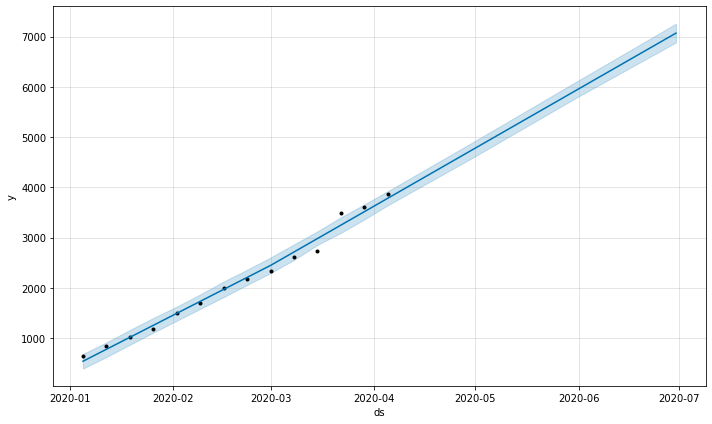

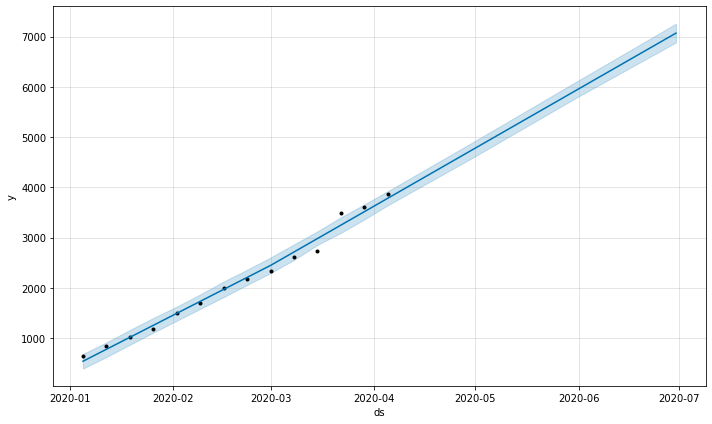

In [ ]:
# Plot the forecast
model.plot(forecast)